In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import tqdm
import os
from PIL import Image

2023-08-01 16:54:57.600756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 16:54:57.746098: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 16:54:57.749662: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-01 16:54:57.749676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
RANDOM_SEED = 0
DATA_PATH = "../data/derived_data/items_with_floor/"
AUGMENTED_DATA_PATH = "../data/derived_data/data_augmented/"

In [84]:
def random_crop(image):
    # Vertical and Horizontal coordinate of the top-left corner of the bounding box in image. 
    offset_height, offset_width = random.randint(0, image.shape[0]//2 - 100), random.randint(0, image.shape[1]//2 - 50)
    # Height and Width of the bounding box. 
    target_height, target_width = random.randint(image.shape[0]//2.5, image.shape[0] - offset_height), random.randint(image.shape[1]//2.5, image.shape[1] - offset_width)

    plt.imshow(tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width))

operations = [
    tf.keras.layers.RandomRotation(0.5, interpolation="nearest", seed=None),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=None),
    random_crop,
    tf.keras.layers.RandomHeight(0.5, interpolation='nearest', seed=None),
    tf.keras.layers.RandomWidth(0.5, interpolation='nearest', seed=None),
    tf.keras.layers.RandomContrast(0.75, seed=None),
    tf.keras.layers.RandomBrightness(0.5, value_range=(0, 255), seed=None),
    lambda image: tf.image.random_hue(image, 0.25, seed=None),
    lambda image: tf.image.random_saturation(image, 0, 1, seed=None),
]

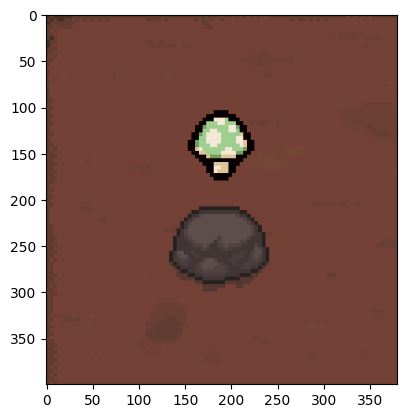

In [85]:
img = Image.open("/home/mizunno/Projects/TBOI_item_detector/data/derived_data/items_with_floor/1_1up!.png")
img_arr = np.array(img)
plt.imshow(img_arr)

# Visualise operations

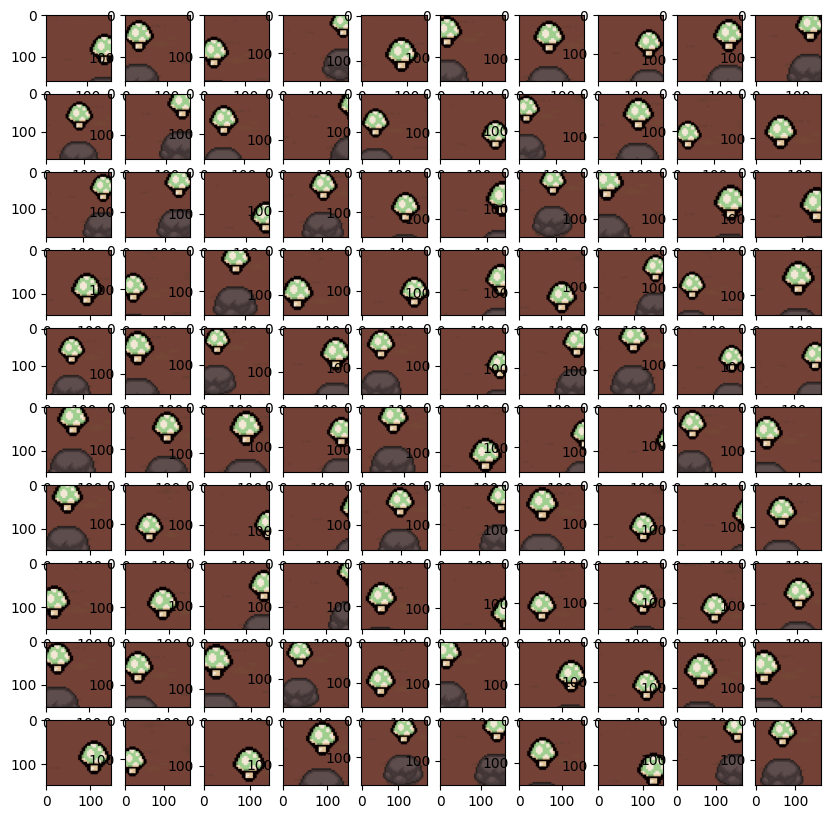

In [86]:
plt.figure(figsize=(10, 10))

op = operations[2]

for i in range(100):
    img_augmented = op(img_arr)
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(Image.fromarray(img_augmented.numpy().astype(np.uint8), "RGB"))
plt.show()

# Visualise augmented images

In [175]:
augmented_images_paths = glob.glob(f'{AUGMENTED_DATA_PATH}/*/*.png')

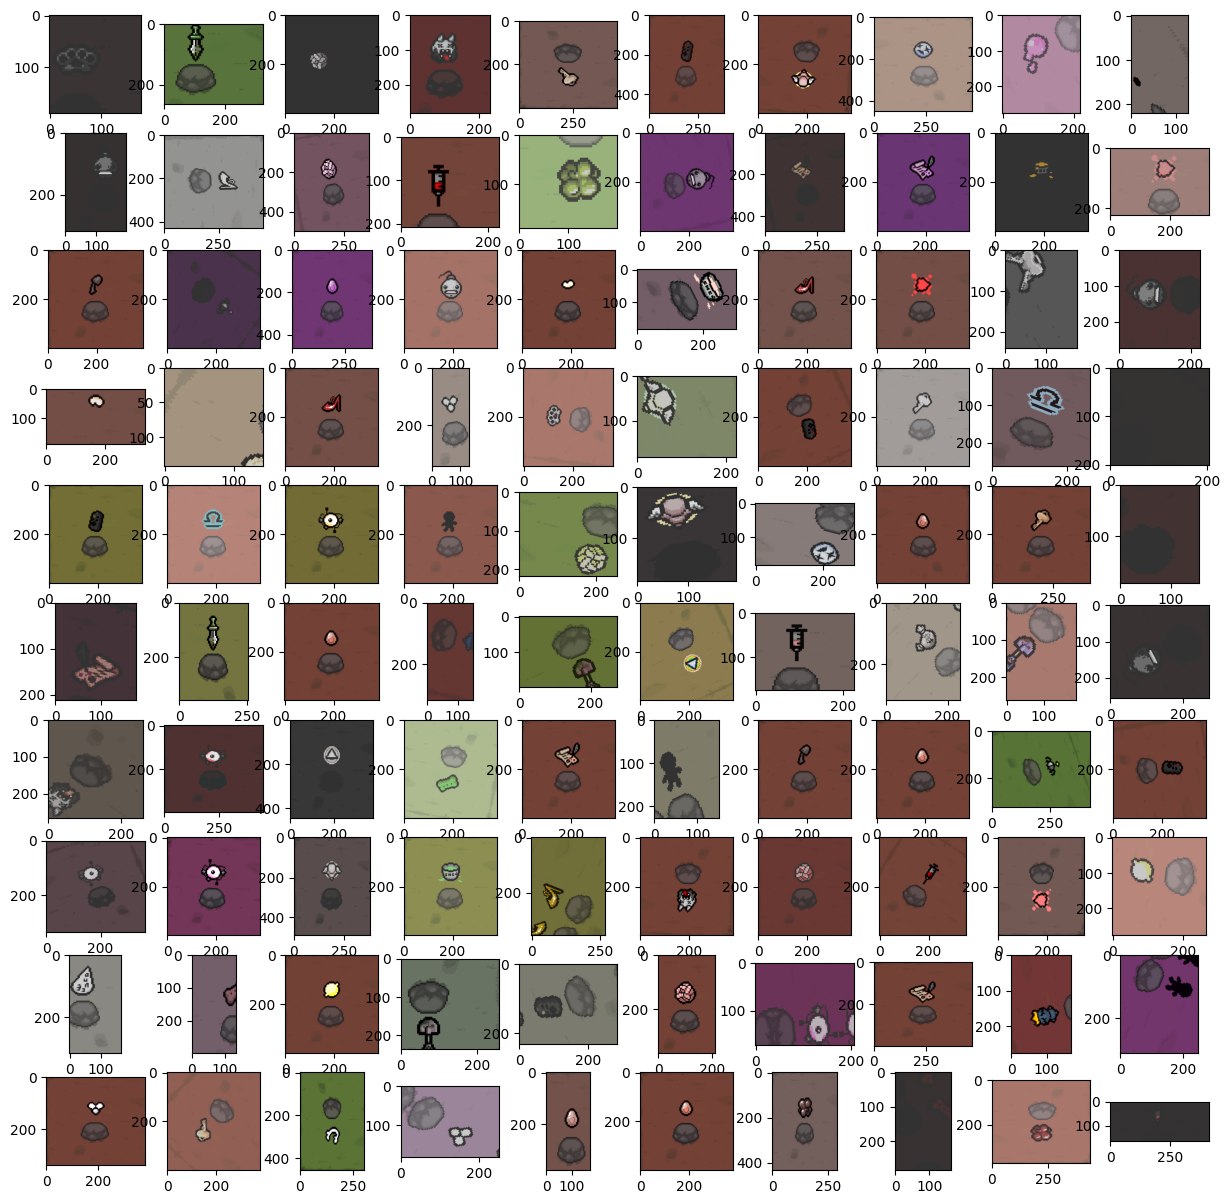

In [177]:
plt.figure(figsize=(15, 15))

for i, augmented_image_path in enumerate(random.choices(augmented_images_paths, k = 100)):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(plt.imread(augmented_image_path))

plt.show()

# Visualise Custom Random Crop

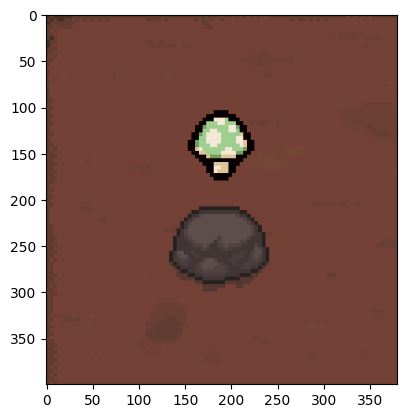

In [174]:
img = Image.open("/home/mizunno/Projects/TBOI_item_detector/data/derived_data/items_with_floor/1_1up!.png")
img_arr = np.array(img)
plt.imshow(img_arr)

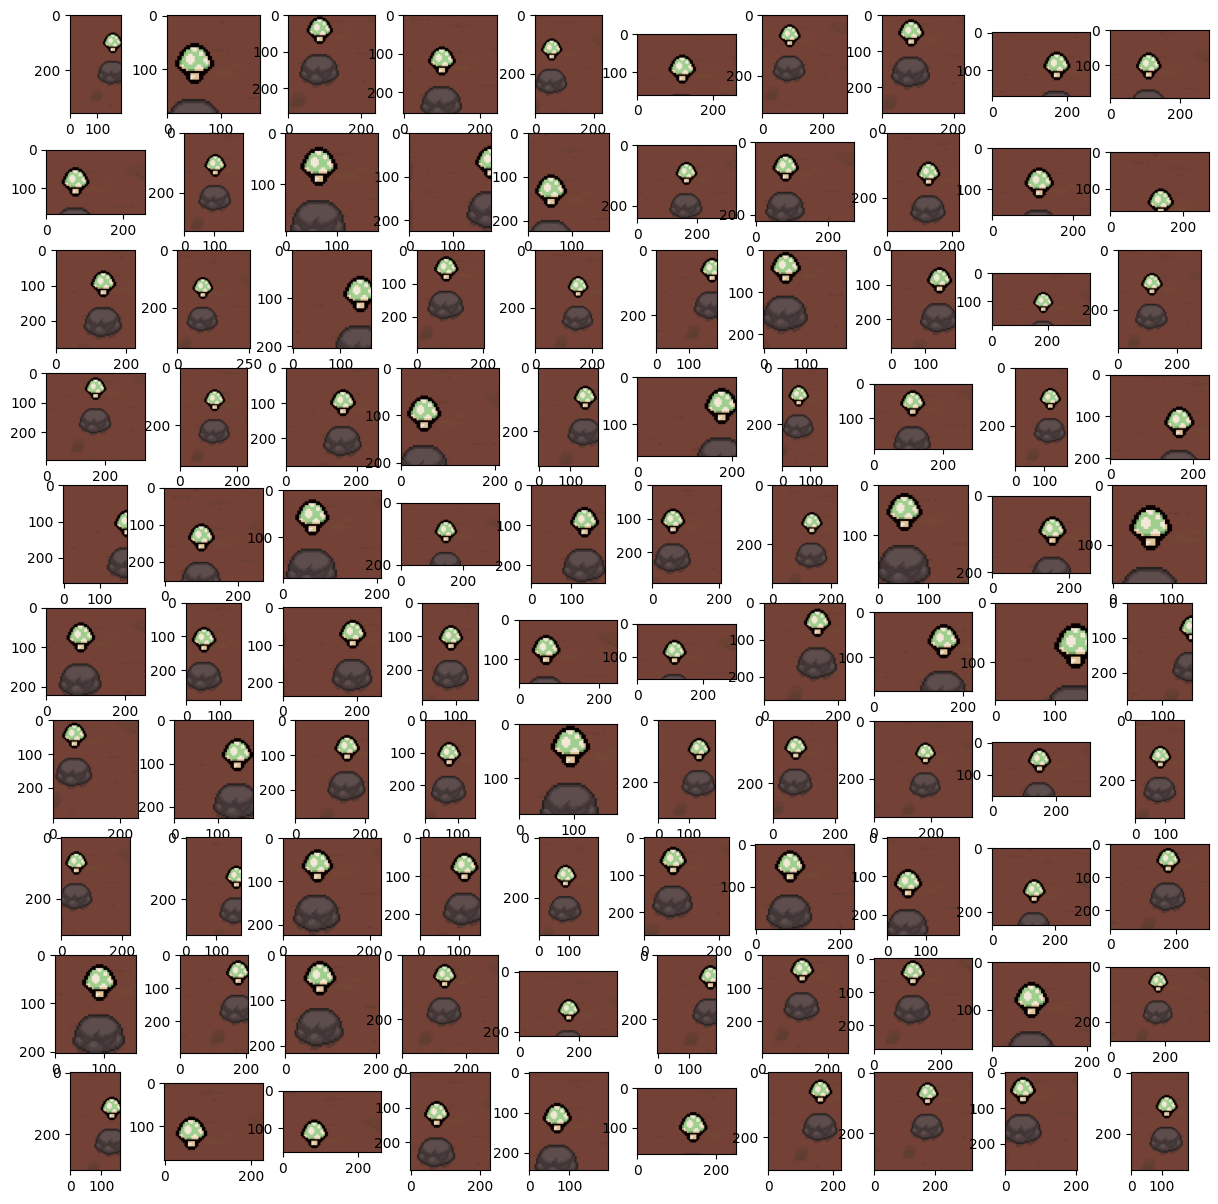

In [173]:
plt.figure(figsize=(15, 15))

for i in range(100):

    # Vertical and Horizontal coordinate of the top-left corner of the bounding box in image. 
    offset_height, offset_width = random.randint(0, img_arr.shape[0]//2 - 100), random.randint(0, img_arr.shape[1]//2 - 50)
    # Height and Width of the bounding box. 
    target_height, target_width = random.randint(img_arr.shape[0]//2.5, img_arr.shape[0] - offset_height), random.randint(img_arr.shape[1]//2.5, img_arr.shape[1] - offset_width)
    
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(tf.image.crop_to_bounding_box(img_arr, offset_height, offset_width, target_height, target_width))

plt.show()
